# Import Libraries

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Load Dataset

In [234]:
df = pd.read_csv('/kaggle/input/climate-change-impact-on-agriculture/climate_change_impact_on_agriculture_2024.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


# EDA

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

**Consists of:**
* 14 columns
* 10000 rows
* 9 columns are float data type, 2 columns are int data type, and 4 columns are object data type. This means there are 11 columns of numeric type and 4 columns of categoricalal type

In [236]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


In [237]:
#Check for data duplication
df.duplicated().sum()

0

In [238]:
#Display the number of unique values of a column of categorical type
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

tot_len= 0
for i in df.columns:
    if i not in numeric_columns:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(df[i].value_counts())
        tot_len= tot_len+ df[i].nunique()
        print()
        print()

                 COUNTRY                 
Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64


                 REGION                  
Region
South                         754
Northeast                     752
North                         524
Central                       466
Punjab                        288
Victoria                      283
New South Wales               276
East                          273
South West                    270
Ontario                       269
West Bengal                   267
North West                    264
Volga                         261
South East                    260
West                          257
Grand Est                     254
Queensland                    253
Midwest                       253
Nouvelle-Aquitaine            252
Patagonia                     249
Tamil Nadu   

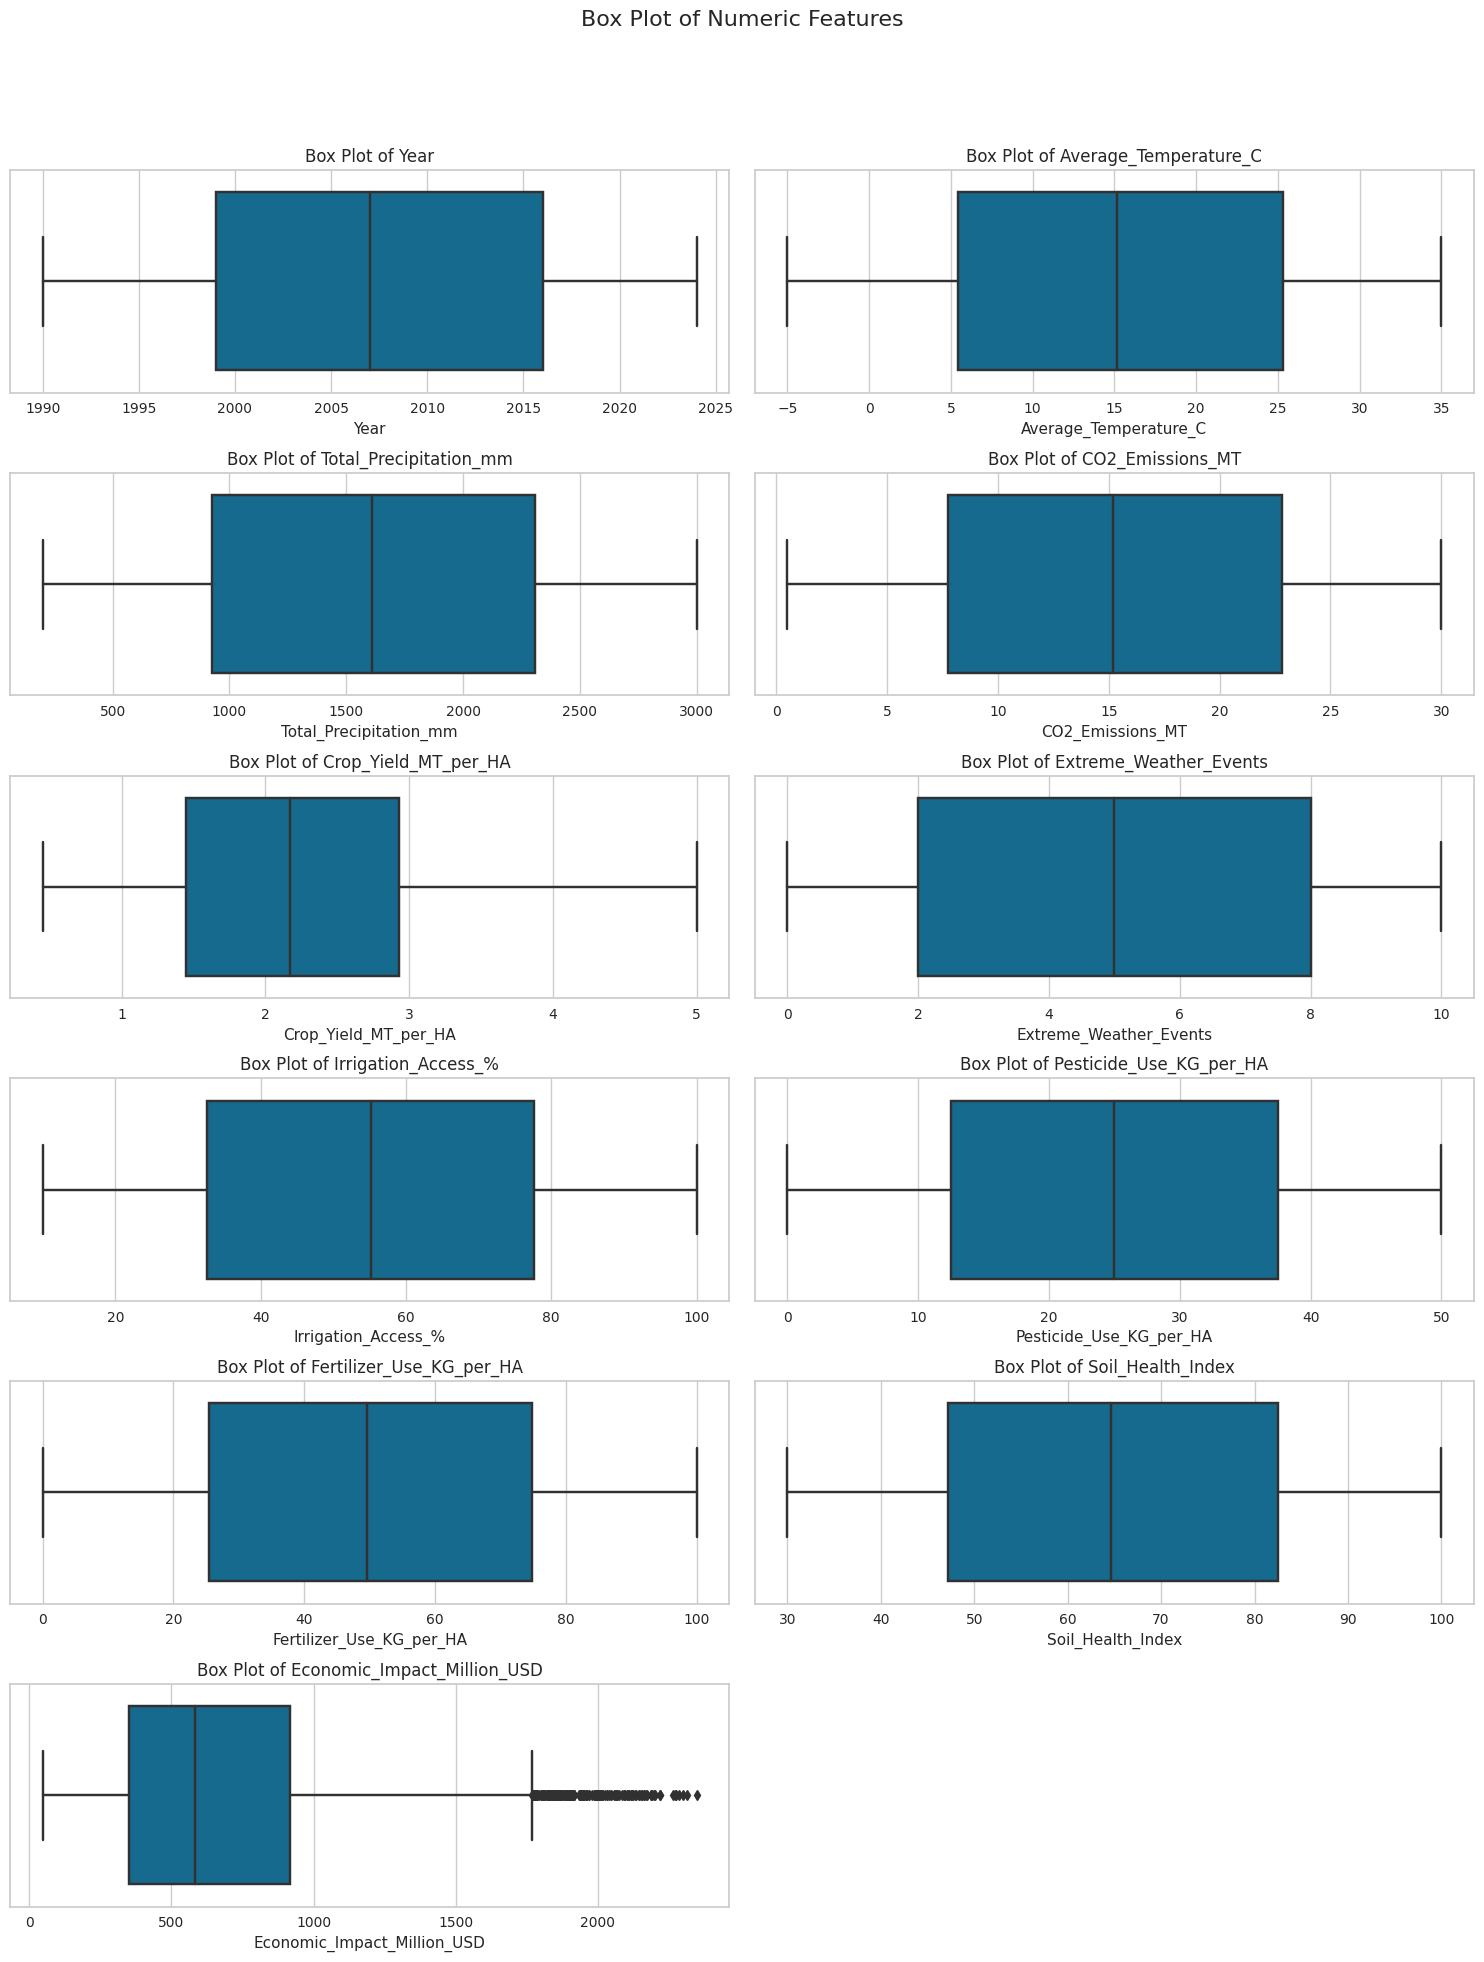

In [239]:
# Detection of outliers
n_rows = 6
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Box Plot of Numeric Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

There are outliers in the 'Economic_Impact_Million_USD' column.



# Data distribution visualization for numeric columns


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

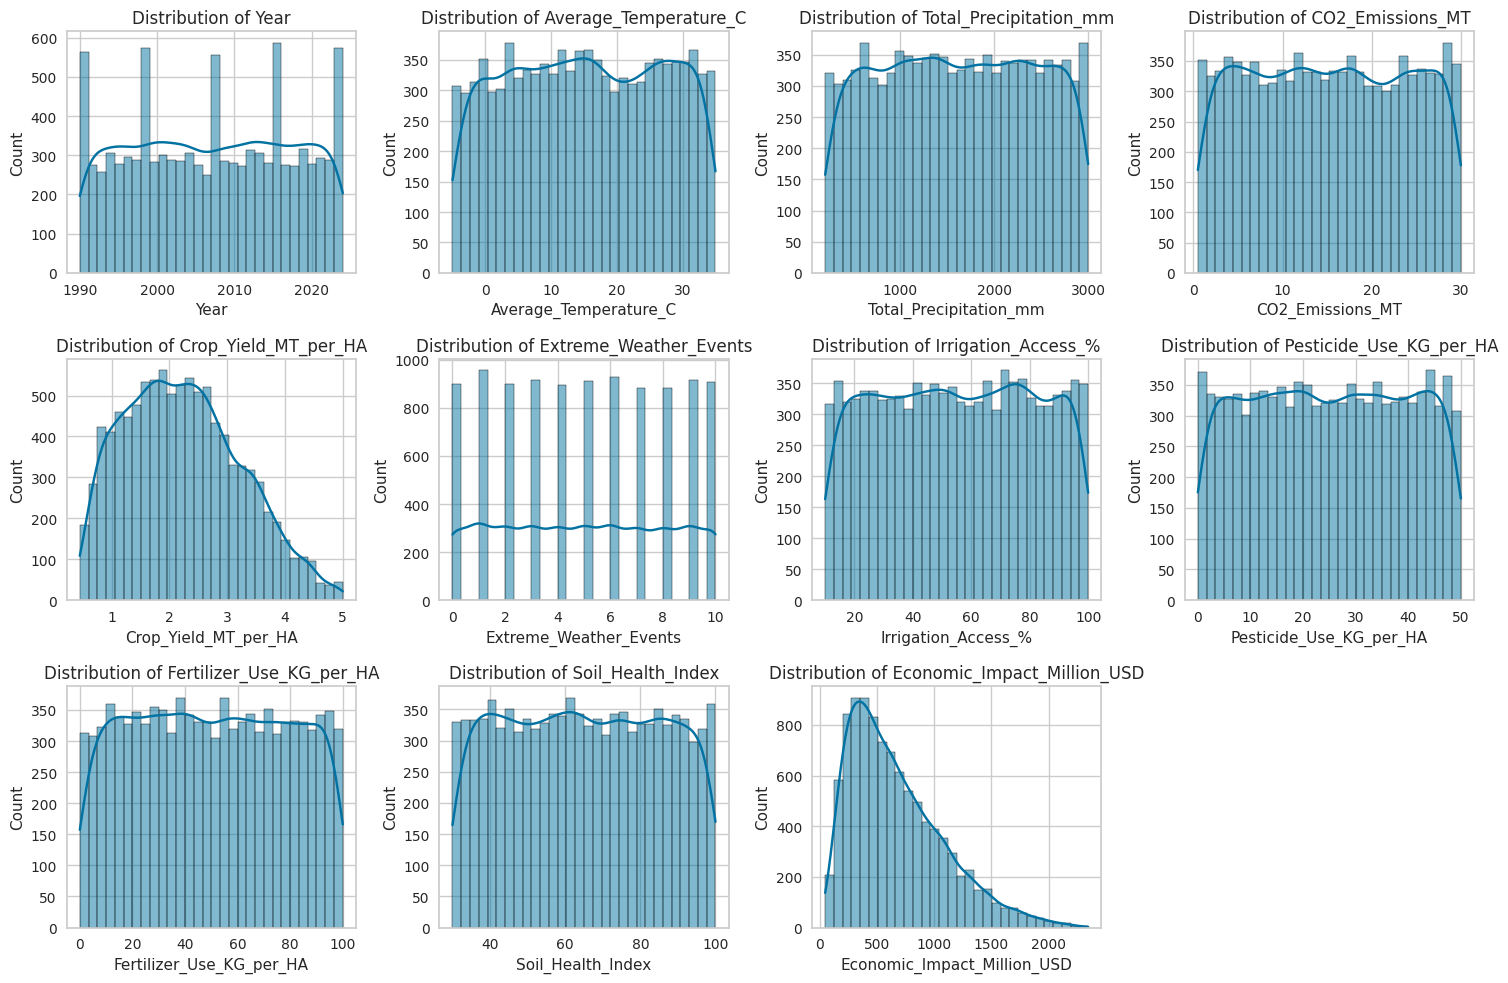

In [240]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# The correlation between numeric columns

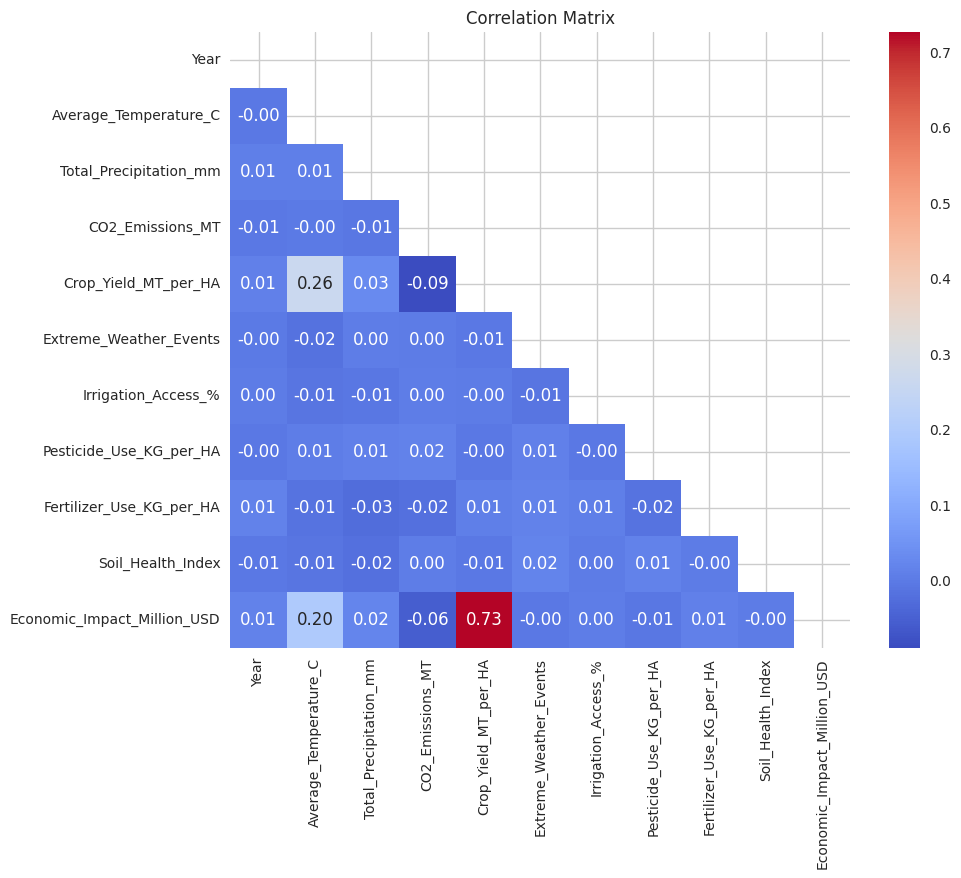

In [241]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

Detected column 'Crop_Yield_MT_per_HA' with 'Economic_Impact_Million_USD' has the highest correlation value



# Data Preprocesing


In [242]:
# Remove outliers using IQR
Q1 = df['Economic_Impact_Million_USD'].quantile(0.25)
Q3 = df['Economic_Impact_Million_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Economic_Impact_Million_USD'] < lower_bound) | (df['Economic_Impact_Million_USD'] > upper_bound)]

df = df.drop(outliers.index)

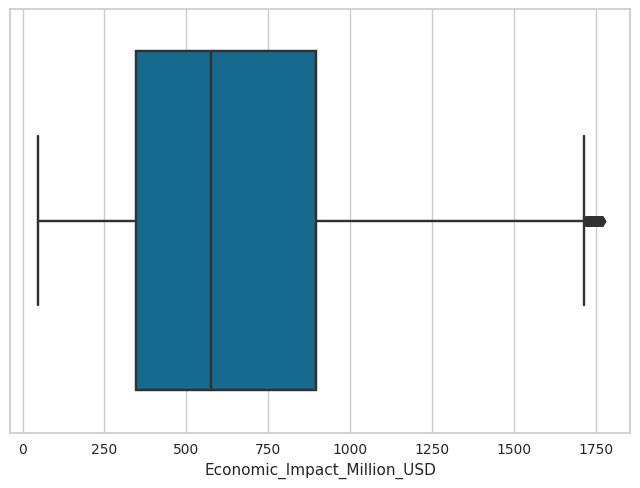

In [243]:
sns.boxplot(x=df['Economic_Impact_Million_USD'])
plt.show()

In [244]:
# Standardize text columns
for col in categorical_columns:
    df[col] = df[col].str.lower().str.strip()

# Data transformation 

In [245]:
clus_df = df.copy()

In [246]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    clus_df[col] = label_encoder.fit_transform(clus_df[col])

clus_df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,6,32,2,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,4,808.13
1,2024,4,8,2,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,0,616.22
2,2001,5,4,9,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,4,796.96
3,2001,3,18,1,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,2,790.32
4,1998,6,28,7,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,0,401.72


# Data standardization 

In [247]:
scaler = StandardScaler()
clus_df = pd.DataFrame(scaler.fit_transform(clus_df), columns=df.columns)

clus_df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,-0.600806,0.514449,1.646823,-0.891751,-1.183203,-1.443129,-0.006217,-0.481912,0.953810,-1.565384,-1.024986,-1.224563,0.909502,1.401099,0.412638
1,1.679381,-0.181520,-0.836193,-0.891751,-1.037644,1.616976,1.692823,-0.481912,0.953810,-1.699746,0.560497,-0.929682,-0.537710,-1.429046,-0.092033
2,-0.600806,0.166465,-1.250029,1.547686,0.511515,-0.382760,1.219186,-0.500495,0.005887,1.124948,0.170680,0.542285,0.143564,1.401099,0.383264
3,-0.600806,-0.529505,0.198397,-1.240242,1.095483,-0.565609,-0.158666,1.740775,0.005887,1.496081,-0.728312,1.309951,1.312523,-0.013974,0.365802
4,-0.898222,0.514449,1.232987,0.850704,-1.127752,0.021373,-0.403048,-1.160177,1.269784,1.561145,1.339439,1.327358,-0.756055,-1.429046,-0.656109


# Data Splitting

Selecting data in the 'Crop_Yield_MT_per_HA' and 'Economic_Impact_Million_USD' classes as modeling parameters later on.

In [248]:
X = df.iloc[:, [7, 14]].values

print(pd.DataFrame(X, columns=['Crop_Yield_MT_per_HA','Economic_Impact_Million_USD']))

      Crop_Yield_MT_per_HA  Economic_Impact_Million_USD
0                    1.737                       808.13
1                    1.737                       616.22
2                    1.719                       796.96
3                    3.890                       790.32
4                    1.080                       401.72
...                    ...                          ...
9818                 3.033                      1483.06
9819                 2.560                       829.61
9820                 1.161                       155.99
9821                 3.348                      1613.90
9822                 3.710                       453.14

[9823 rows x 2 columns]


# K-Means 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

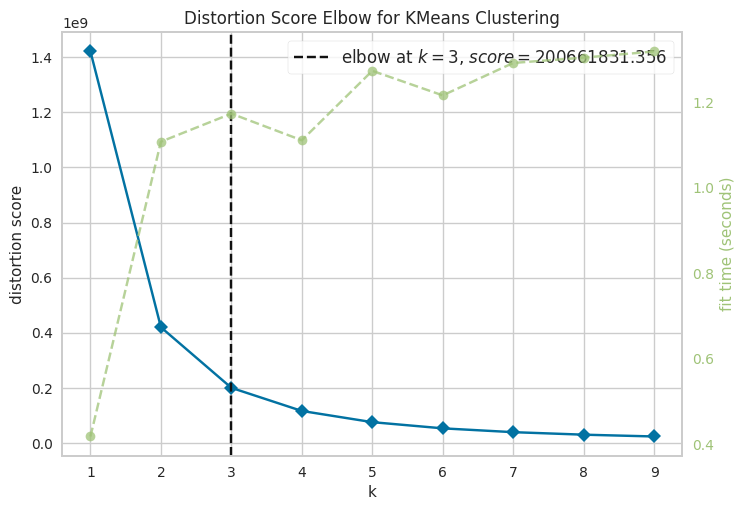

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [249]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10)) #helps find the optimal number of clusters
visualizer.fit(X)
visualizer.show()

In [250]:
kmeans_model = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_labels = kmeans_model.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [251]:
# Analysis of characteristics for each cluster 
def analyze_clusters(X, labels, k):
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_cropYield = cluster_data[:, 0].mean() 
        mean_economicImpact = cluster_data[:, 1].mean()  

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Average Crop Yield MT per HA: {mean_cropYield:.2f}")
        print(f"Average Economic Impact Million USD: {mean_economicImpact:.2f}")
    
analyze_clusters(X, kmeans_labels, k=3)


Cluster 1:
Average Crop Yield MT per HA: 1.61
Average Economic Impact Million USD: 329.91

Cluster 2:
Average Crop Yield MT per HA: 3.24
Average Economic Impact Million USD: 1281.94

Cluster 3:
Average Crop Yield MT per HA: 2.45
Average Economic Impact Million USD: 751.04


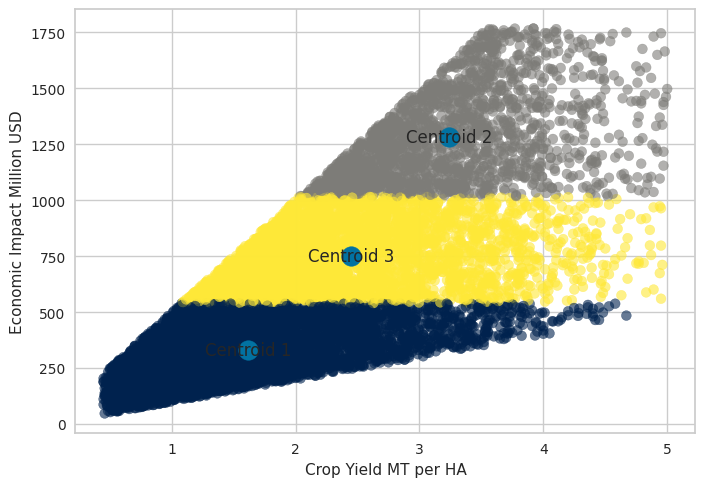

Value Centroids:
Centroid 1: Crop Yield = 1.61, Economic Impact = 330.23
Centroid 2: Crop Yield = 3.24, Economic Impact = 1281.80
Centroid 3: Crop Yield = 2.45, Economic Impact = 751.39


In [252]:
centroids = kmeans_model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='cividis', s=50, alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1],  s=200)

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='center', va='center')

plt.xlabel('Crop Yield MT per HA')
plt.ylabel('Economic Impact Million USD')

plt.show()

print("Value Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Crop Yield = {centroid[0]:.2f}, Economic Impact = {centroid[1]:.2f}")


In [253]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, kmeans_model.labels_):.3f}")

Silhouette Coefficient: 0.576


The silhouette coefficient measures how similar a point is to points in its own cluster compared to points in other clusters. It ranges from -1 (poor clustering) to 1 (ideal clustering).

In [254]:
y_pred = kmeans_model.predict(X)

result_kmeans = df.copy()
result_kmeans['cluster'] = y_pred
result_kmeans

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,cluster
0,2001,india,west bengal,corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,water management,808.13,2
1,2024,china,north,corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,crop rotation,616.22,2
2,2001,france,ile-de-france,wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,water management,796.96,2
3,2001,canada,prairies,coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,no adaptation,790.32,2
4,1998,india,tamil nadu,sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,crop rotation,401.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,france,nouvelle-aquitaine,cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,no adaptation,1483.06,1
9996,1999,australia,queensland,soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,no adaptation,829.61,2
9997,2000,argentina,patagonia,coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,water management,155.99,0
9998,1996,brazil,southeast,soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,crop rotation,1613.90,1


# DBSCAN 
(Density-Based Spatial Clustering of Applications with Noise)

In [255]:
db_model = DBSCAN(eps=6, min_samples=10).fit(X)
db_labels = db_model.labels_

In [256]:
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 4


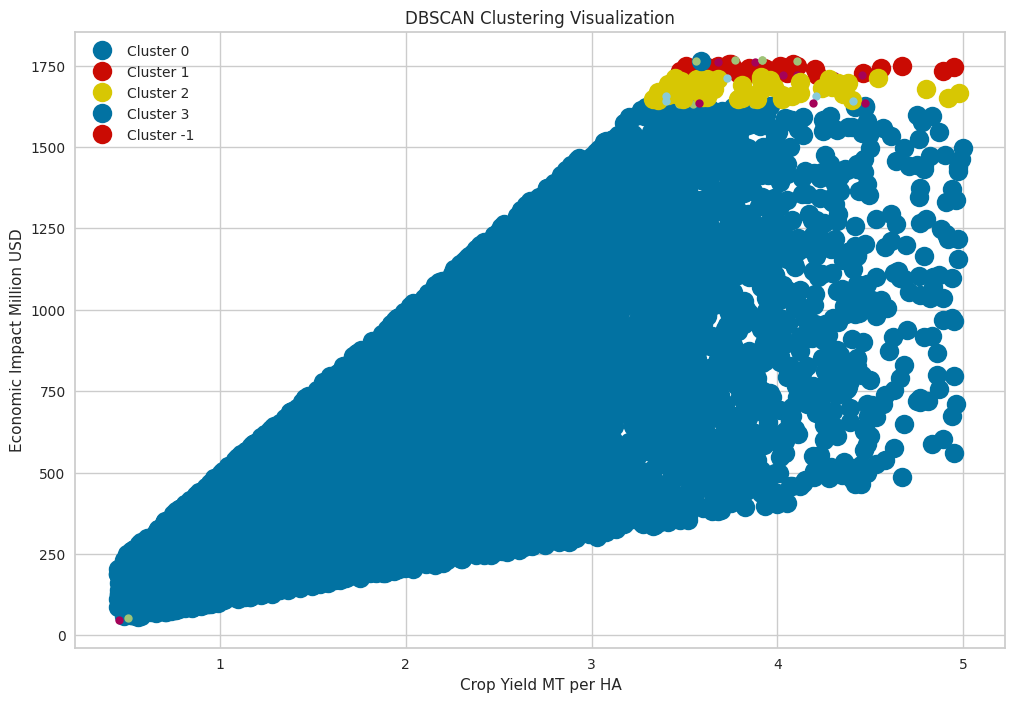

In [257]:
unique_labels = set(db_labels)
core_samples_mask = np.zeros_like(db_labels, dtype=bool)
core_samples_mask[db_model.core_sample_indices_] = True

plt.figure(figsize=(12, 8)) 

for k in unique_labels:
    class_member_mask = (db_labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markersize=14, label=f"Cluster {k}")

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markersize=6)

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Crop Yield MT per HA")
plt.ylabel("Economic Impact Million USD")
plt.legend()
plt.show()

In [258]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, db_labels):.3f}")

Silhouette Coefficient: 0.469


In [259]:
analyze_clusters(X, db_labels, k=4)


Cluster 1:
Average Crop Yield MT per HA: 2.18
Average Economic Impact Million USD: 637.17

Cluster 2:
Average Crop Yield MT per HA: 3.90
Average Economic Impact Million USD: 1738.98

Cluster 3:
Average Crop Yield MT per HA: 3.79
Average Economic Impact Million USD: 1678.32

Cluster 4:
Average Crop Yield MT per HA: 3.81
Average Economic Impact Million USD: 1766.07


In [260]:
result_db = df.copy()
result_db['cluster'] = db_labels
result_db

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,cluster
0,2001,india,west bengal,corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,water management,808.13,0
1,2024,china,north,corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,crop rotation,616.22,0
2,2001,france,ile-de-france,wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,water management,796.96,0
3,2001,canada,prairies,coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,no adaptation,790.32,0
4,1998,india,tamil nadu,sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,crop rotation,401.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,france,nouvelle-aquitaine,cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,no adaptation,1483.06,0
9996,1999,australia,queensland,soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,no adaptation,829.61,0
9997,2000,argentina,patagonia,coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,water management,155.99,0
9998,1996,brazil,southeast,soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,crop rotation,1613.90,0


# models comparison

In [261]:
from sklearn import metrics

def evaluate_model_test(data, labels):
    results = {
        'Silhouette Score': metrics.silhouette_score(data, labels)
    }
    return results

results = {
    'K-Means': evaluate_model_test(X, kmeans_labels),
    'DBSCAN': evaluate_model_test(X, db_labels),
}

summary_df = pd.DataFrame(columns=['Silhouette_Score'])

rows = []
for model_name, model_metrics in results.items():
    rows.append({
        'Model': model_name,
        'Silhouette Score': model_metrics['Silhouette Score']
    })
    
summary_df = pd.DataFrame(rows)

print(summary_df)

     Model  Silhouette Score
0  K-Means          0.576499
1   DBSCAN          0.468960


# conclusion

In [262]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.tolist()
numeric_columns.append('cluster')

mean_result = result_kmeans[numeric_columns].groupby('cluster').mean().T
mean_result

cluster,0,1,2
Year,2007.069357,2007.008380,2007.075116
Average_Temperature_C,13.281117,18.884553,15.856569
Total_Precipitation_mm,1601.844257,1650.634162,1600.470383
CO2_Emissions_MT,15.674622,14.633397,15.072201
Crop_Yield_MT_per_HA,1.613348,3.240931,2.450548
Extreme_Weather_Events,5.028571,4.970391,4.924304
Irrigation_Access_%,55.190410,55.003659,55.314806
Pesticide_Use_KG_per_HA,25.144550,24.811045,24.723999
Fertilizer_Use_KG_per_HA,49.825505,50.634587,49.770667
Soil_Health_Index,65.141117,65.119291,64.409620


In [263]:
clus_0 = result_kmeans[result_kmeans['cluster']==0]
clus_1 = result_kmeans[result_kmeans['cluster']==1]
clus_2 = result_kmeans[result_kmeans['cluster']==2]

In [264]:
def pie_chart(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts().head()
    axes.pie(cnts, labels=cnts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
    axes.set_title( s.upper(), fontsize=14, fontweight='bold')

def bar_plt(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts().head(5)
    bars = axes.bar(cnts.index, cnts.values)
    axes.bar_label(bars)
    axes.set_title(s.upper(), fontsize=14, fontweight='bold')
    axes.get_yaxis().set_visible(False)
    axes.set_xlabel(col)

# Cluster Visualization for 'Country' and 'Region'

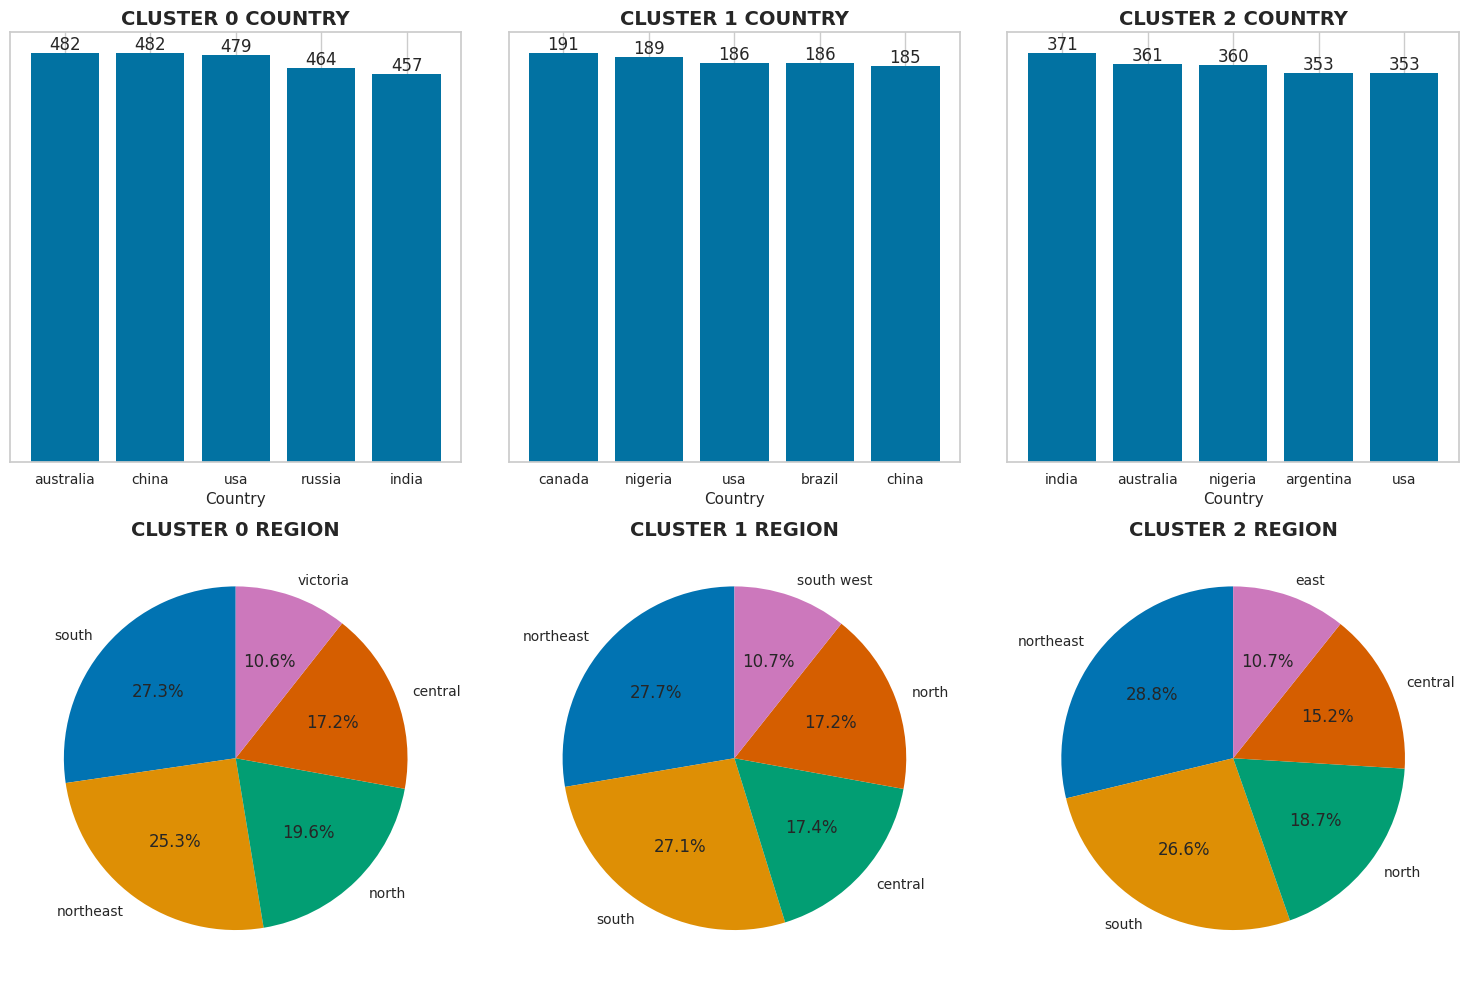

In [265]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
bar_plt(clus_0, 'Country', axes[0,0], 'cluster 0')
bar_plt(clus_1, 'Country', axes[0,1], 'cluster 1')
bar_plt(clus_2, 'Country', axes[0,2], 'cluster 2')

pie_chart(clus_0, 'Region', axes[1,0], 'cluster 0')
pie_chart(clus_1, 'Region', axes[1,1], 'cluster 1')
pie_chart(clus_2, 'Region', axes[1,2], 'cluster 2')

plt.tight_layout()
plt.show()

* In cluster 0, 'Country' is mostly in Australia, China and USA. Then in cluster 2, 'Country' tends to be mostly in India, Nigeria and Australia. While in cluster 1, 'Country' is mostly in Canada, Nigeria and Brazil.
* 
In all clusters, 'Region' is mostly in South, Northeast and North.

# Cluster Visualization for 'Crop Type'

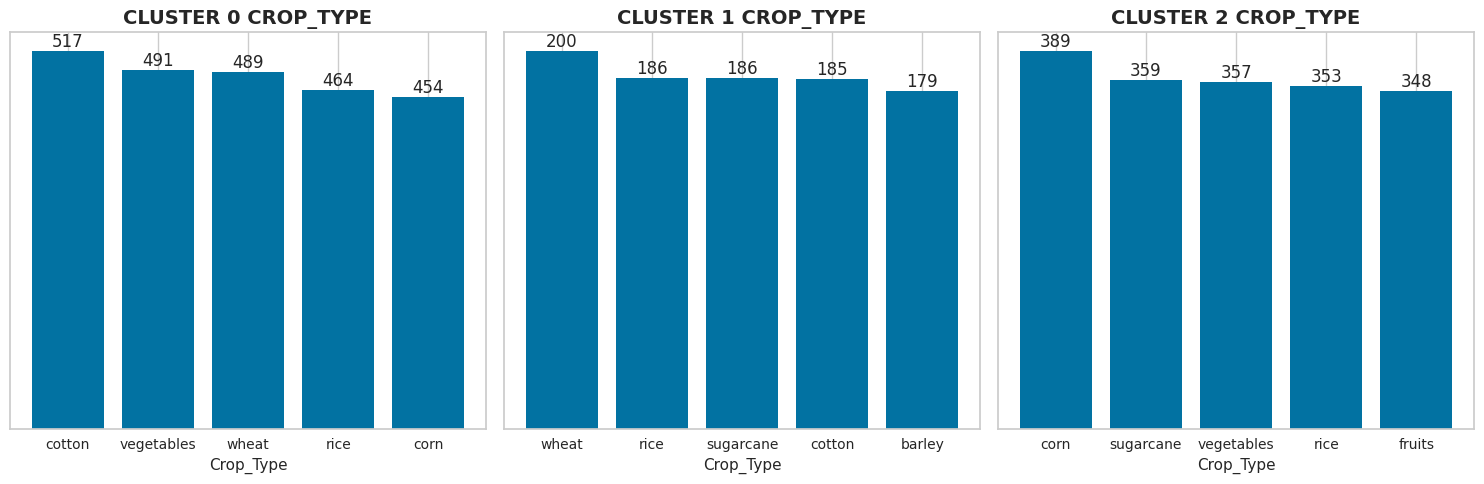

In [266]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
bar_plt(clus_0, 'Crop_Type', axes[0], 'cluster 0')
bar_plt(clus_1, 'Crop_Type', axes[1], 'cluster 1')
bar_plt(clus_2, 'Crop_Type', axes[2], 'cluster 2')

plt.tight_layout()
plt.show()

* Cluster 0, the majority of 'Crop_Type' are Cotton, Vegetables and Wheat with a fairly large number of each crop type.
* Then in cluster 2, more crop types are Corn, Vegetables, and Sugarcane with the number of each crop type not as much as in cluster 0.
* Then in cluster 1, it tends to be dominated by the types of plants Wheat, Sugarcane, and rice with a smaller number than in cluster 2.

# Cluster Visualization for 'Adaptation Strategies'

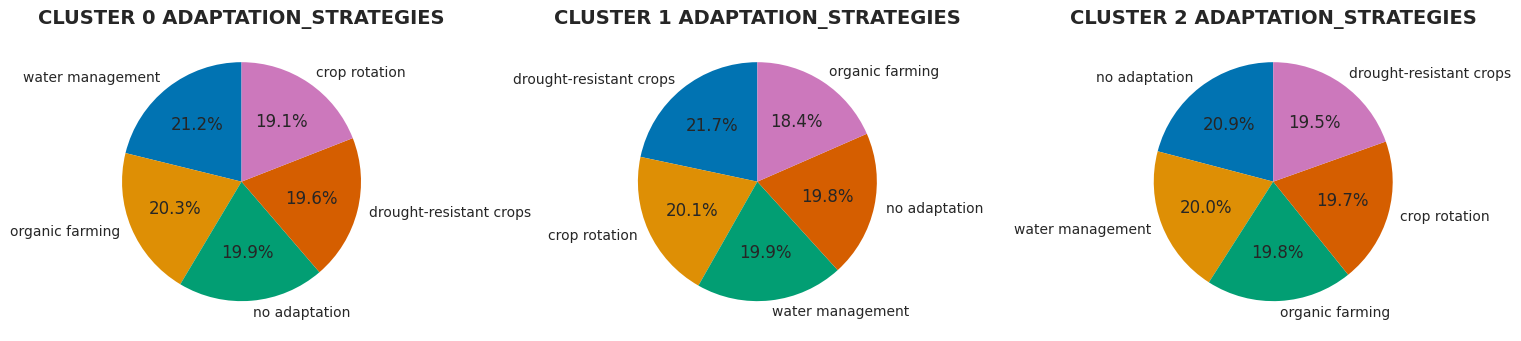

In [267]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
pie_chart(clus_0, 'Adaptation_Strategies', axes[0], 'cluster 0')
pie_chart(clus_1, 'Adaptation_Strategies', axes[1], 'cluster 1')
pie_chart(clus_2, 'Adaptation_Strategies', axes[2], 'cluster 2')

plt.tight_layout()
plt.show()

* Clusters 0 and 1, the majority of 'Adaptation_Strategies' or things done are Water Management, Organic Farming and No Adaptation.
* Then in cluster 2, more adapted by means of Drought-resistant Crops, Crop Rotation and Water Management.

# Interpretation of Results:
1. Cluster 0: Has the highest CO2 emissions, extreme weather events, pesticide use intensity. But with the lowest average temperature, lowest crop yield and highest soil health index, it has the lowest economic impact of the other two clusters.

2. Cluster 1: Despite having a higher average temperature, CO2 emissions, frequency of extreme weather events, and lower soil health index than cluster 0, the cluster has a greater economic impact than cluster 0. This may be due to several factors, including lower total rainfall and higher crop yields than cluster 0. On the other hand, it could be that greater access to irrigation leads to lower economic impact compared to cluster 2.

3. Cluster 2: The highest average temperature, highest total rainfall, highest pesticide and fertilizer use and much greater crop yields than the other clusters make cluster 2 the one with the greatest economic impact when compared to the other clusters.

Conclusion of Interpretation: The greater the value of crop yields, the greater the economics impact.